In [1]:
import scanpy as sc
import scFates as scf
from matplotlib.colors import LinearSegmentedColormap
sc.set_figure_params()

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
adata=sc.read("data/adata_aligned.h5ad")

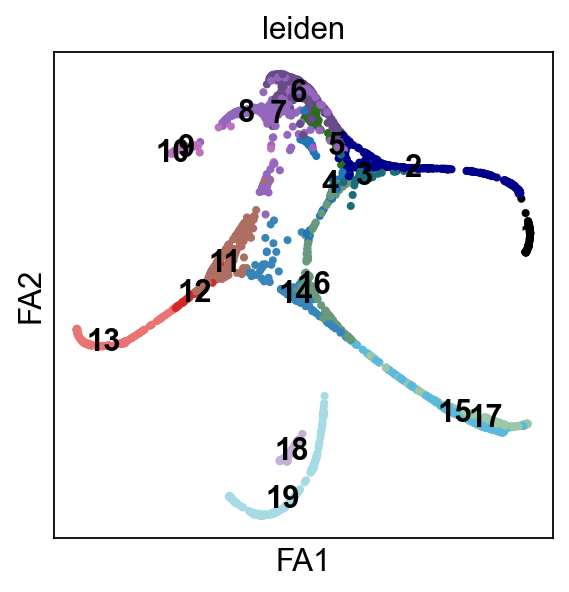

In [3]:
sc.pl.draw_graph(adata,color="leiden",legend_loc="on data")

In [4]:
adata=adata[~adata.obs.leiden.isin(["18","19"])]

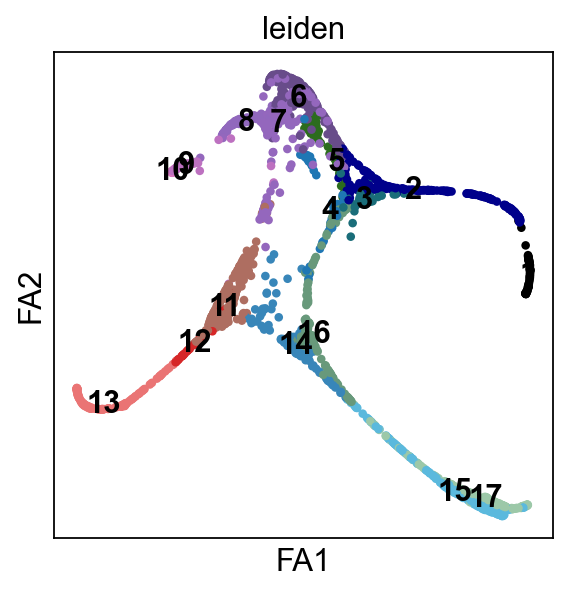

In [5]:
leidencol=adata.uns["leiden_colors"][:17].copy()
sc.pl.draw_graph(adata,color="leiden",legend_loc="on data")

In [6]:
adata_big=adata[~adata.obs.leiden.isin(["14","15"])]
adata_small=adata[adata.obs.leiden.isin(["14","15"])]

In [7]:
scf.tl.tree(adata_big,Nodes=600,use_rep="X_msdiff",method="ppt",seed=42,ppt_lambda=50,ppt_sigma=.15,ppt_nsteps=100)

inferring a principal tree inferring a principal tree --> parameters used 
    600 principal points, sigma = 0.15, lambda = 50, metric = euclidean
    fitting:  32%|███▏      | 32/100 [00:04<00:08,  7.98it/s]
    converged


Trying to set attribute `.uns` of view, copying.


    finished (0:00:04) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


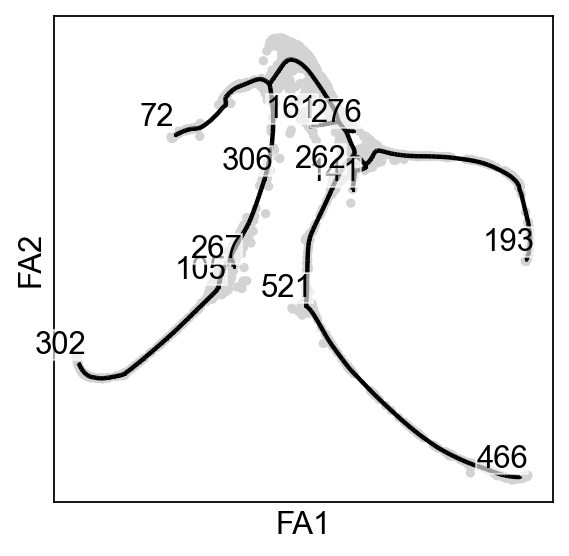

In [8]:
scf.pl.graph(adata_big,basis="draw_graph_fa",size_nodes=.1,forks=False)

    graph cleaned --> removed 67 principal points


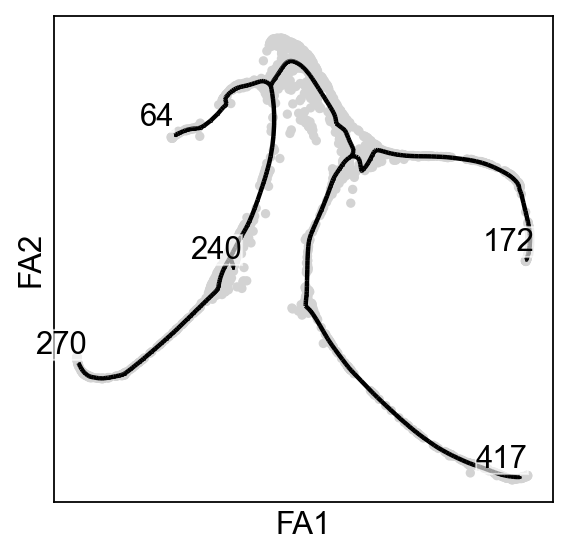

In [9]:
scf.tl.cleanup(adata_big,minbranchlength=10,leaves=[161,141])
scf.pl.graph(adata_big,basis="draw_graph_fa",size_nodes=.1,forks=False)

In [10]:
scf.tl.tree(adata_small,Nodes=100,use_rep="X_msdiff",method="ppt",seed=42,ppt_lambda=50,ppt_sigma=.15,ppt_nsteps=100)

inferring a principal tree inferring a principal tree --> parameters used 
    100 principal points, sigma = 0.15, lambda = 50, metric = euclidean
    fitting:  22%|██▏       | 22/100 [00:00<00:00, 182.78it/s]

Trying to set attribute `.uns` of view, copying.



    converged
    finished (0:00:00) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


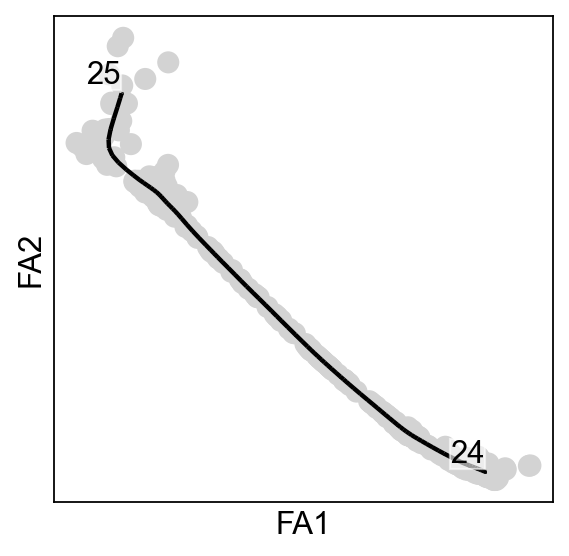

In [11]:

scf.pl.graph(adata_small,basis="draw_graph_fa",size_nodes=.1,forks=False)

<AxesSubplot:xlabel='FA1', ylabel='FA2'>

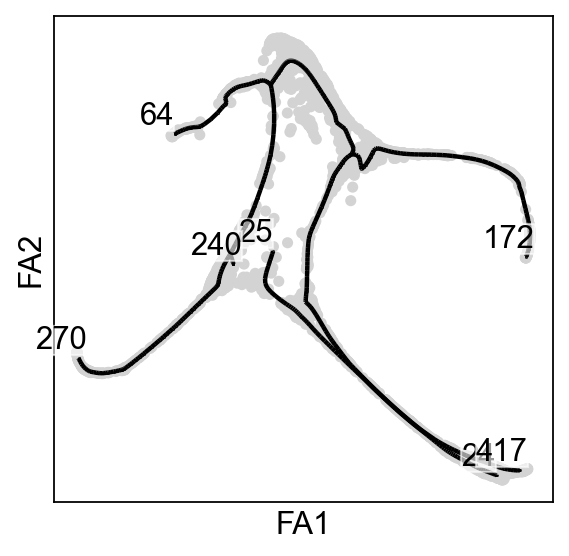

In [12]:
ax=scf.pl.graph(adata_small,basis="draw_graph_fa",size_nodes=.1,forks=False,show=False,s=100)
scf.pl.graph(adata_big,basis="draw_graph_fa",size_nodes=.1,forks=False,show=False,s=100,ax=ax)

In [13]:
adata=scf.tl.attach_tree(adata_big,adata_small,linkage=(240,25))

attaching tree
    merging
    tree refitting
    finished (0:00:00) --> datasets combined


... storing 'batch' as categorical
... storing 'plate' as categorical
... storing 'devtime' as categorical
... storing 'leiden' as categorical


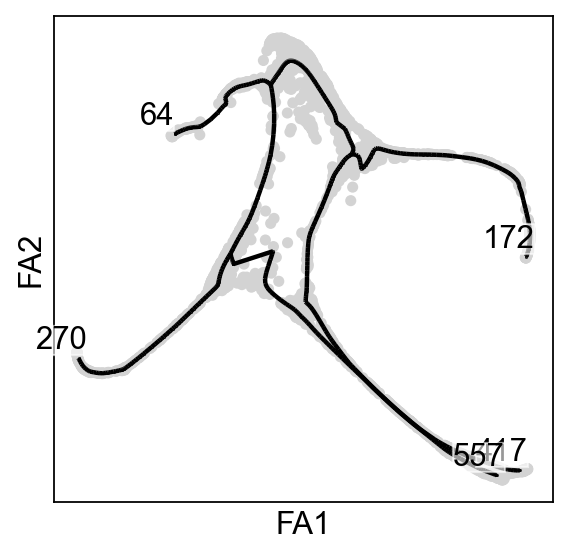

In [14]:
scf.pl.graph(adata,basis="draw_graph_fa",size_nodes=.1,forks=False,s=100)

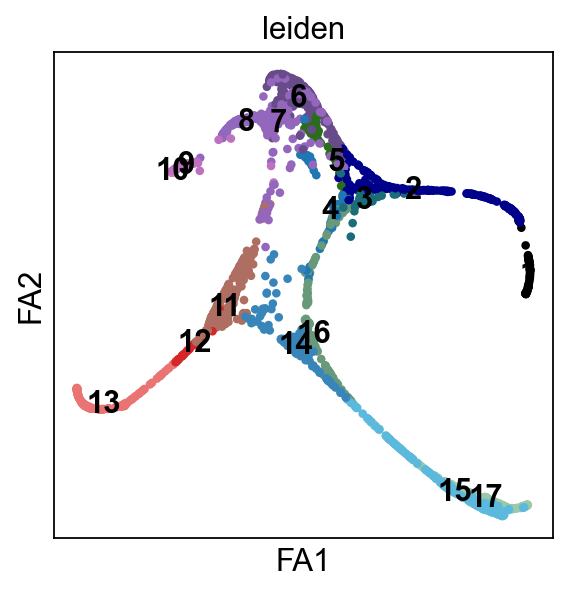

In [15]:
sc.pl.draw_graph(adata,color="leiden",palette=leidencol.tolist(),legend_loc="on data")

In [16]:
scf.tl.root(adata,172)
scf.tl.pseudotime(adata)

node 172 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [17]:
scf.tl.extend_tips(adata,restrict_seg=True)

extending tree
    finished (0:00:01) --> tips extended


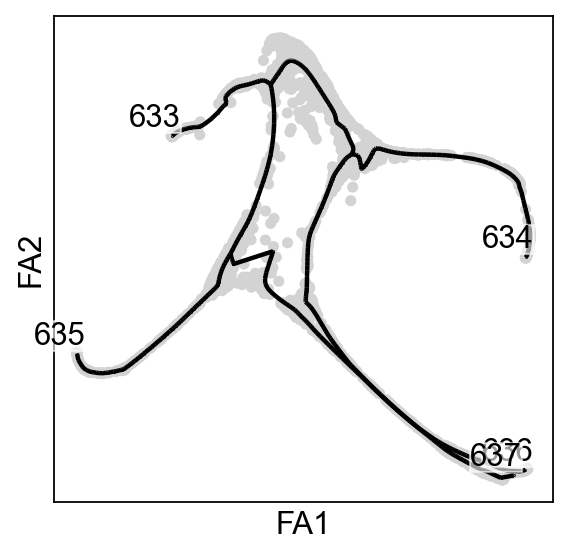

In [18]:
scf.pl.graph(adata,basis="draw_graph_fa",size_nodes=.1,forks=False,s=100)

In [19]:
import re
adata.obs["devtime_float"]=[float(re.findall(r"[-+]?\d*\.\d+|\d+", d)[0]) for d in adata.obs.devtime]
adata.obs.loc[adata.obs.devtime_float==3,"devtime_float"]=22

In [20]:
scf.tl.root(adata,"devtime_float",tips_only=True,min_val=True)

automatic root selection using devtime_float values
node 634 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [21]:
scf.tl.pseudotime(adata)

projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


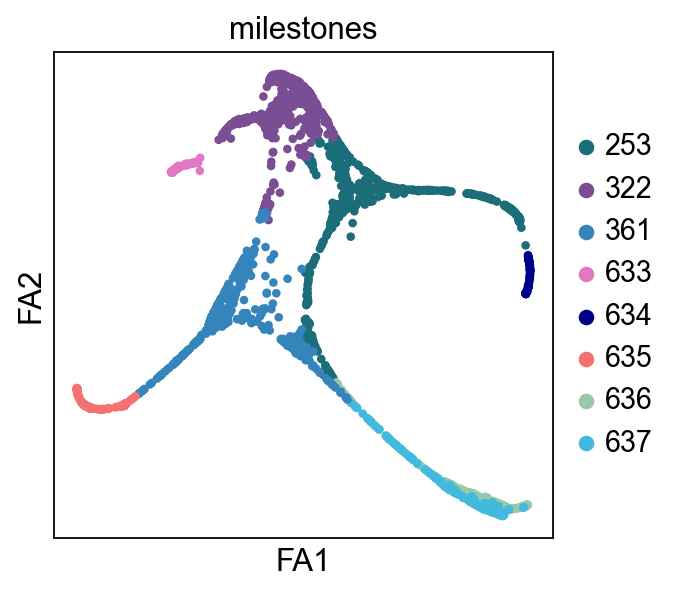

In [24]:
sc.set_figure_params(dpi_save=600)
sc.pl.draw_graph(adata,color="milestones",palette=["#1A6D79","#7A4E94","#3585bc","tab:pink","darkblue","#F37271","#97C8A8","#44B9DE"])

In [25]:
import pandas as pd
import numpy as np
mils=pd.Series(adata.uns["graph"]["milestones"])
adata.uns["milestones_colors"]=np.array(adata.uns["milestones_colors"])
adata.uns["seg_colors"]=[adata.uns["milestones_colors"][m][0] for m in [adata.obs.milestones.cat.categories==mils[mils==t].index[0] for t in adata.uns["graph"]["pp_seg"].to]]

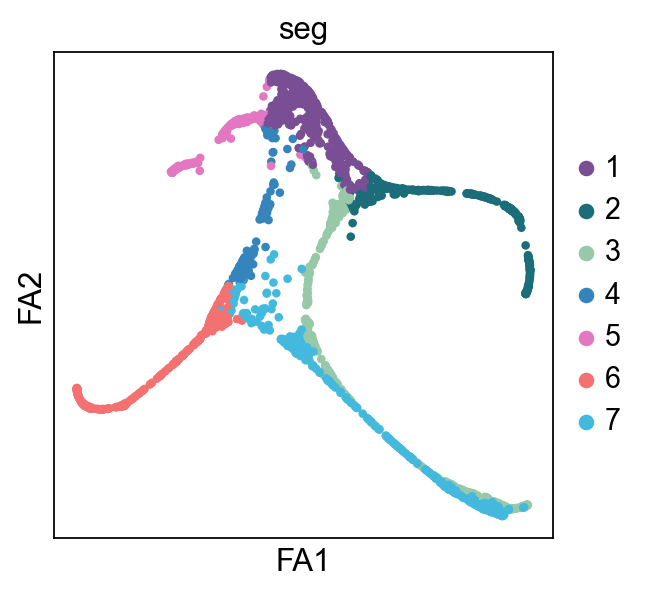

In [26]:
sc.pl.draw_graph(adata,color="seg")

In [27]:
scf.tl.rename_milestones(adata,["A","B","C","II","immature","Ia","Ic","Ib"])

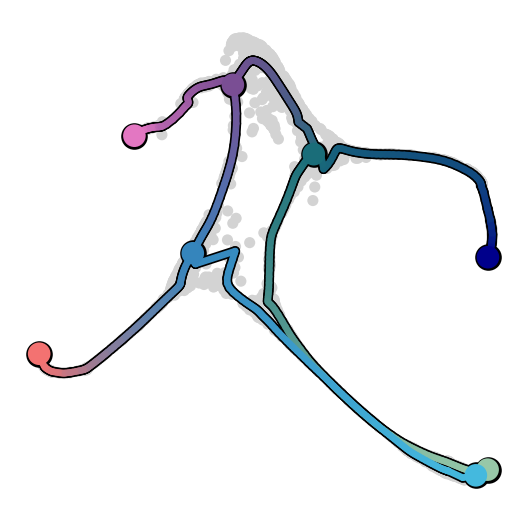

In [28]:
sc.set_figure_params(dpi_save=600)
scf.pl.trajectory(adata,color_seg="milestones",basis="draw_graph_fa",frameon=False,s=100,scale_path=.6,save="paths.png")

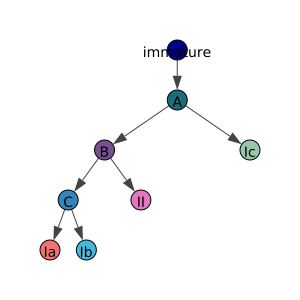

In [29]:
scf.pl.milestones(adata,figsize=(300,300))

In [30]:
scf.tl.dendrogram(adata,crowdedness=.2)

Generating dendrogram of tree
    finished (0:00:00) --> added 
    .obs['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


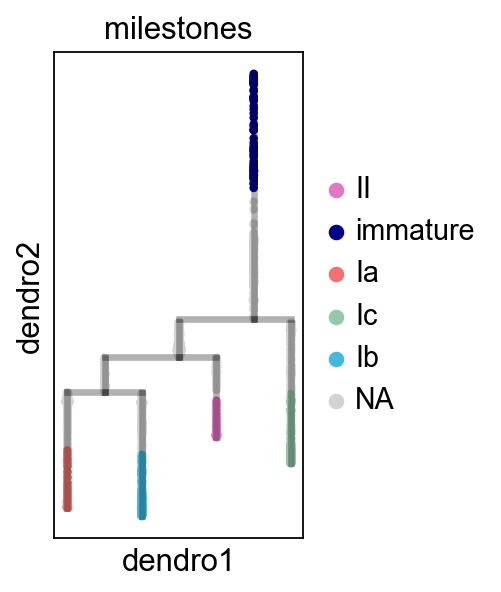

In [31]:
sc.set_figure_params(figsize=(2,4))
scf.pl.dendrogram(adata,color="milestones",groups=["immature","Ia","Ib","Ic","II"])

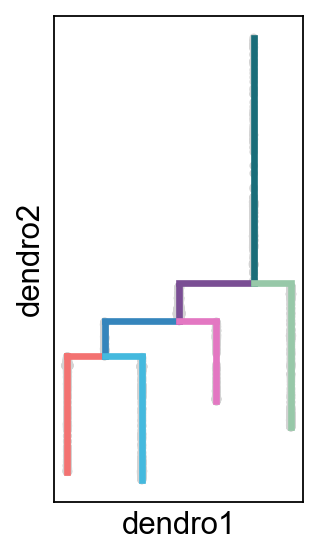

In [32]:
scf.pl.dendrogram(adata,color_seg="seg",alpha_seg=1)

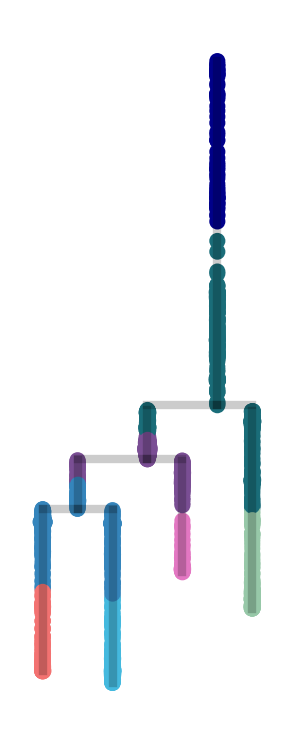

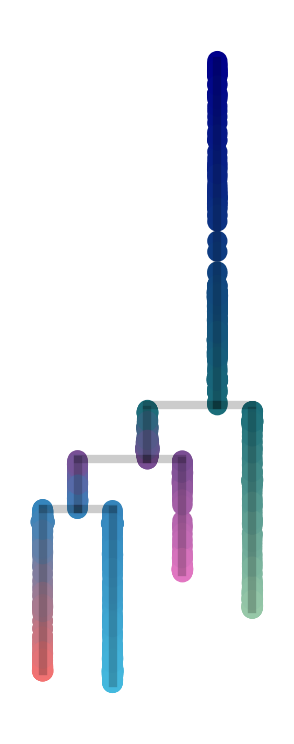

In [33]:
sc.set_figure_params(figsize=(1,3),frameon=False,dpi=150,dpi_save=600)
scf.pl.dendrogram(adata,color="milestones",title="",show_info=False,linewidth_seg=2,alpha_seg=.2)
scf.pl.dendrogram(adata,color_milestones=True,save="_milestones.svg",title="",show_info=False,linewidth_seg=2,alpha_seg=.2)

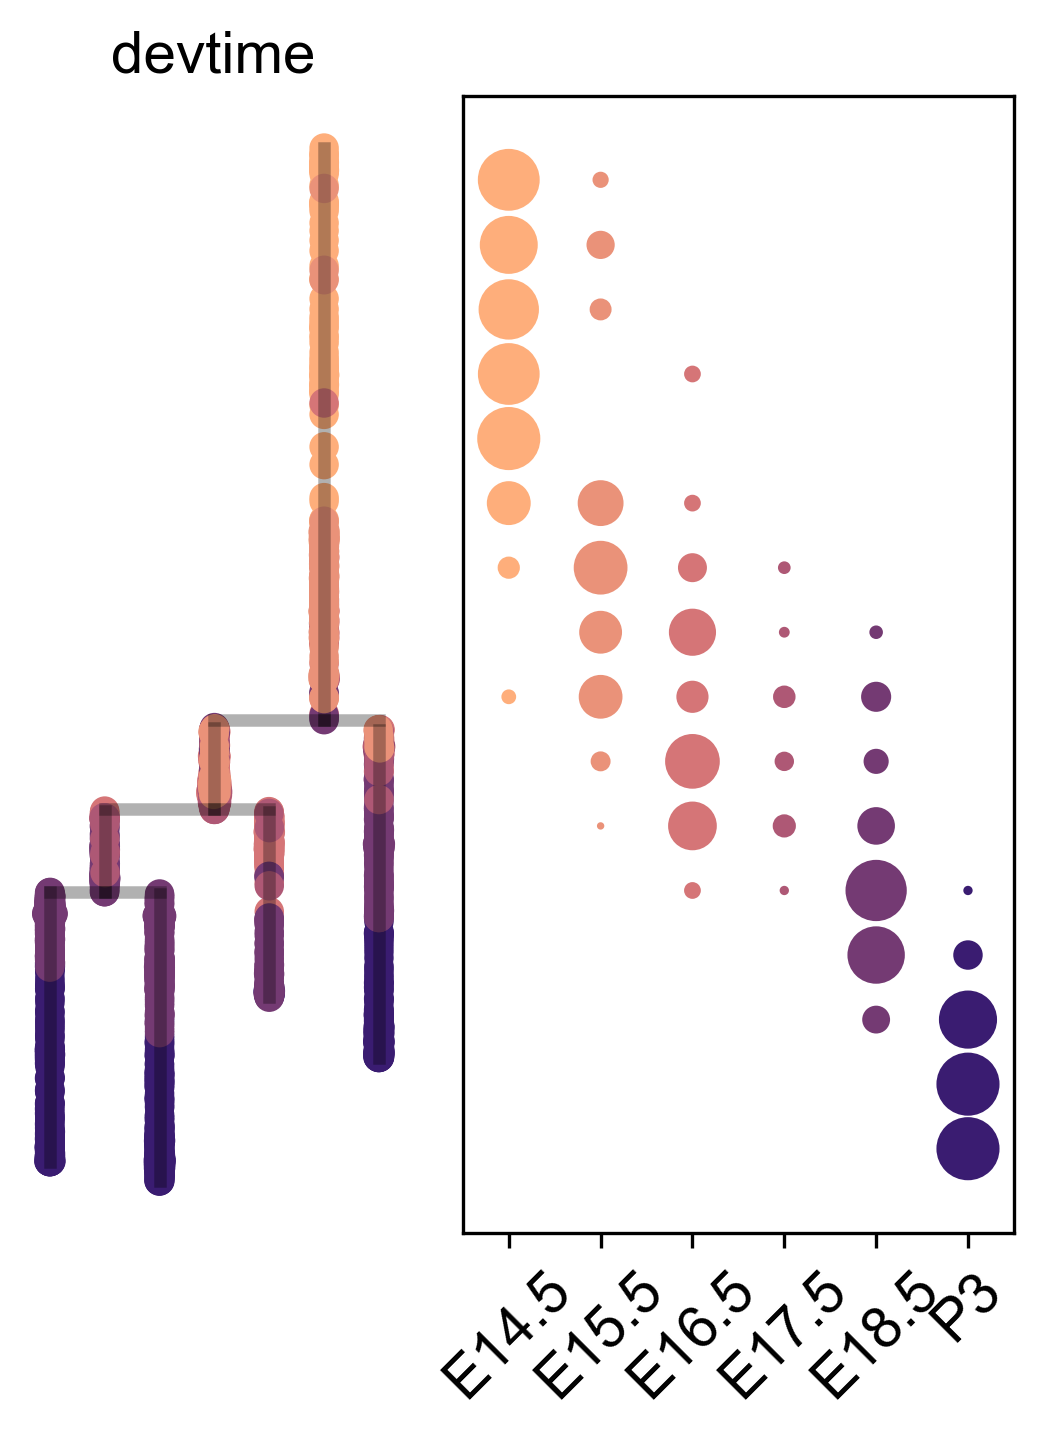

In [34]:
import matplotlib.pyplot as plt
sc.set_figure_params(figsize=(3.5,4.8),frameon=False,dpi=150,dpi_save=600)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,gridspec_kw={"width_ratios":(1,1.5)})
scf.pl.dendrogram(adata,color="devtime",legend_loc="none",ax=ax1,s=200,show=False,frameon=False)
scf.pl.binned_pseudotime_meta(adata,"devtime",nbins=16,rotation=45,rev=True,show_colorbar=True,show=False,ax=ax2)
plt.savefig("figures/devtime_dendro_dotplot.svg")

In [43]:
adata.obsm["X_dendro"]

array([[ 4.00000000e+00, -2.93074123e+01],
       [ 5.98146082e+00, -3.17018930e+01],
       [ 3.82969480e-03, -3.51449786e+01],
       ...,
       [ 5.00055623e+00, -1.56540537e+01],
       [ 3.00331880e+00, -2.19595931e+01],
       [ 5.00000000e+00, -1.43512887e+00]])

36.00614136082614

-36.03346665642782

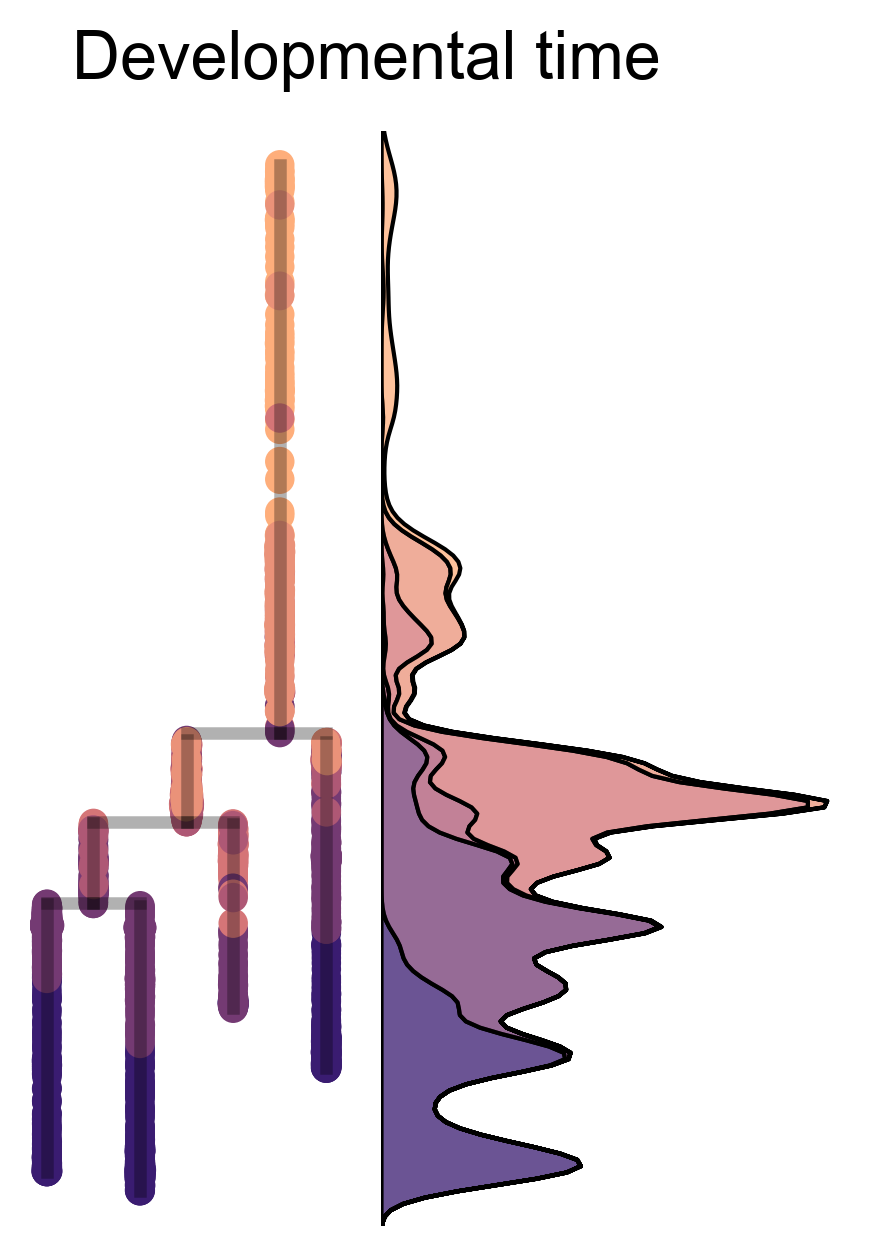

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(figsize=(3.5,4.8),frameon=False,dpi=150,dpi_save=600)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,gridspec_kw={"width_ratios":(1,1.5),"wspace":0.1})
fig.suptitle('Developmental time', fontsize=16)
scf.pl.dendrogram(adata,color="devtime",title="",legend_loc="none",ax=ax1,s=200,show=False,frameon=False)
df=adata.obs.copy()
df.t=-df.t
k=sns.kdeplot(data=df,y="t",hue="devtime",multiple="stack",bw=.2,
              palette=adata.uns["devtime_colors"].tolist(),ax=ax2)
ax2.legend([],[], frameon=False)
ax2.axis('off')
ax2.set_ylim([df.t.min()-(df.t.max()-df.t.min())/30,
              df.t.max()+(df.t.max()-df.t.min())/30])
plt.savefig("figures/devtime_dendro_kde.svg")

In [35]:
adata.write("data/adata_tree.h5ad")

In [36]:
scf.tl.test_association(adata,n_jobs=40)
scf.tl.fit(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 20699/20699 [02:15<00:00, 153.01it/s]
    found 4875 significant features (0:02:15) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.
fit features associated with the trajectory
    single mapping : 100%|██████████| 4875/4875 [00:54<00:00, 89.35it/s]
    finished (adata subsetted to keep only fitted features!) (0:01:00) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [37]:
adata.write("data/adata_tree_fitted.h5ad")

In [2]:
import scanpy as sc
adata=sc.read("adata_tree_fitted.h5ad")

In [5]:
adata.var[["A","fdr"]].to_csv("all_diff_pseudo.csv")

In [6]:
import pandas as pd

In [12]:
GO=pd.read_table("GO_term_summary_20211022_060133.txt",index_col=1)

In [45]:
def gather_GO(n):
    if n in GO.index:
        if type(GO.loc[n]["Qualifier"]) == str:
            return pd.DataFrame({GO.loc[n]["Qualifier"]:1},index=[n])
        else:
            out=pd.DataFrame(GO.loc[n]["Qualifier"].value_counts())
            out.columns=[n]
            return out.T

In [46]:
allgo=[gather_GO(n) for n in adata.var_names]

In [51]:
pd.concat(allgo).fillna(0).T.to_csv("cell2cell_go.csv")